In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib as mpl


def set_plotstyle(width=7, height=15 * 3.35 / 16):
    os.environ['PATH'] = os.environ['PATH'] + "C:/Users/FischerVicto/AppData/Local/Programs/MiKTeX/miktex/bin/x64/"
    os.environ['PATH'] = os.environ['PATH'] + r"C:\Users\FischerVicto\AppData\Local\Programs\MiKTeX\miktex\bin\x64\mgs.exe"
    os.environ['PATH'] = os.environ['PATH'] + r"C:\Users\FischerVicto\AppData\Local\Programs\MiKTeX\miktex\bin\x64\mgsdll64.dll"
    os.environ['PATH'] = os.environ['PATH'] + "C:/Users/FischerVicto/AppData/Local/Programs/MiKTeX/"
    os.environ['PATH'] = os.environ['PATH'] + r"C:\Users\FischerVicto\AppData\Local\Programs\MiKTeX"

    os.environ['PATH'] = os.environ['PATH'] + r"C:/texlive/2023/bin/windows/"
    os.environ['PATH'] = os.environ['PATH'] + r"C:\Program Files\texstudio"
    os.environ['PATH'] = os.environ['PATH'] + "C:/Program Files/texstudio/"

    mpl.rcParams.update(mpl.rcParamsDefault)

    # for latex, you might need to change this
    label_size = 8
    # plt.style.use('fivethirtyeight')
    plt.rc("text", usetex=True)
    plt.rc("text.latex", preamble=r'\usepackage{dsfont}\usepackage{amsmath}\usepackage{physics}')

    pr = {"axes.labelsize": 12,  # LaTeX default is 10pt font.
          "font.size": 12,
          "legend.fontsize": 12,  # Make the legend/label fonts
          "xtick.labelsize": 12,  # a little smaller
          "ytick.labelsize": 12,
          'figure.figsize': (width, height),
          "errorbar.capsize": 2.5,
          "font.family": "serif",
          "font.serif": [],  # blank entries should cause plots
          "font.sans-serif": [],
          }
    for k, v in pr.items():
        mpl.rcParams[k] = v

    mpl.rcParams["font.family"] = "serif"
    # mpl.rcParams["font.serif"] = ["STIX"]
    mpl.rcParams["mathtext.fontset"] = "stix"


In [2]:
import numpy as np

### Load the Data

In [3]:
reference = -8.68247333439895

In [15]:
su2 = np.load('Results/Two-site SU2 DMRG d=1.npy')
su2_plot = su2.flatten() - reference
su2_plot[su2_plot < 10**(-13)] = 10**(-13)
orig = np.load('Results/Two-site Standard DMRG d=25.npy')
orig_plot = orig.flatten() - reference

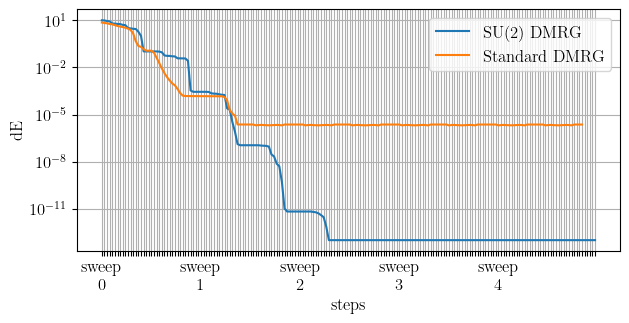

In [16]:
set_plotstyle()
plt.semilogy(range(len(su2_plot)), su2_plot, label='SU(2) DMRG')
plt.semilogy(range(len(orig_plot)), orig_plot, label='Standard DMRG')
labels = []
sweep = 0
for i in range(len(su2_plot)):
    if i % len(su2[0]) == 0:
        labels.append(f'sweep\n{sweep}')
        sweep += 1
    else:
        labels.append(None)

# labels = [i if i % len(su2_en[0]) == 0 else None for i in range(len(su2_plot))]
plt.xticks(range(len(su2_plot)), labels=labels)
plt.ylabel('dE')
plt.xlabel('steps')
plt.grid()
plt.legend()
plt.show()

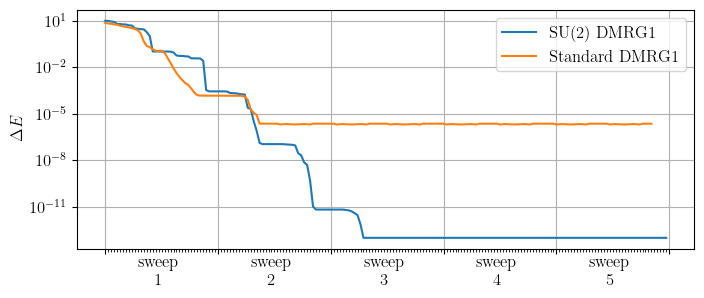

In [17]:
set_plotstyle()
fig, ax = plt.subplots()

ax.semilogy(range(len(su2_plot)), su2_plot, label='SU(2) DMRG1')
ax.semilogy(range(len(orig_plot)), orig_plot, label='Standard DMRG1')
labels = []
sweep = 0
ax.xaxis.set_ticklabels([])
major_xticks_pos = []
major_xticks_names = []
minor_xticks_pos = []
minor_xticks_names = []
for i in range(len(su2_plot)+1):
    if i % len(su2[0]) == 0:
        labels.append(f'sweep\n{sweep}')
        major_xticks_pos.append(i)
        major_xticks_names.append(None)
    elif i % len(su2[0]) == 18:
        sweep += 1
        minor_xticks_pos.append(i)
        minor_xticks_names.append(f'sweep\n{sweep}')
    else:
        minor_xticks_pos.append(i)
        minor_xticks_names.append(None)
# minor_xticks_names = [None for _ in range(len(minor_xticks_pos))]
# major_xticks_names[-1] = None

ax.set_xticks(major_xticks_pos, major_xticks_names)
ax.set_xticks(minor_xticks_pos, minor_xticks_names, minor=True)

plt.tight_layout()
# labels = [i if i % len(su2_en[0]) == 0 else None for i in range(len(su2_plot))]
# plt.xticks(range(len(su2_plot)), labels=labels)
plt.ylabel(r'$\Delta E$')
# plt.xlabel('steps')
plt.grid(True, which='major')
plt.legend()
# fig.savefig('One-site DMRG Comparison d=1.pdf', dpi=400, bbox_inches='tight')
plt.show()

In [18]:
orig_plot

array([7.22422487e+00, 6.80894261e+00, 6.39722300e+00, 5.86360909e+00,
       5.55408016e+00, 4.91621656e+00, 4.35598398e+00, 4.03466513e+00,
       3.70204748e+00, 3.37466037e+00, 2.95958707e+00, 2.45489970e+00,
       1.45262523e+00, 4.57321582e-01, 2.33359475e-01, 2.01405314e-01,
       1.46351119e-01, 1.16488019e-01, 1.16234103e-01, 1.16160162e-01,
       8.52724224e-02, 4.08871784e-02, 1.90470879e-02, 8.58683708e-03,
       4.26326639e-03, 2.38895411e-03, 1.45456938e-03, 9.44789651e-04,
       7.23421158e-04, 4.23102428e-04, 2.32815957e-04, 1.59163676e-04,
       1.50459570e-04, 1.50122217e-04, 1.50093445e-04, 1.50092653e-04,
       1.50092647e-04, 1.50092647e-04, 1.50092642e-04, 1.50091734e-04,
       1.50079828e-04, 1.49777112e-04, 1.49379948e-04, 1.49004213e-04,
       1.48597597e-04, 1.47100196e-04, 1.45035463e-04, 1.29736443e-04,
       8.01707000e-05, 1.96372510e-05, 1.16287027e-05, 8.41568719e-06,
       2.33529587e-06, 2.31340626e-06, 2.31323827e-06, 2.31323767e-06,
      

In [73]:
len(su2[0])

38

In [74]:
38/2

19.0

In [91]:
test = np.array(
    [[3, 1, 0.6],
    [1, 1.5, 0.7],
    [0.6, 0.7, 1.26]]
)

test = np.transpose(np.conjugate(test)) @ test
test

array([[10.36  ,  4.92  ,  3.256 ],
       [ 4.92  ,  3.74  ,  2.532 ],
       [ 3.256 ,  2.532 ,  2.4376]])